In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from PyNomaly import loop
import matplotlib.pyplot as plt
import string

Reading the data and get an overview

In [2]:
# column names to get a data overview
columns = {"letter": "capital letter	(26 values from A to Z)", "x-box": "horizontal position of box(integer)",
           "y-box": "vertical position of box(integer)", "width": "width	width of box(integer)",
           "high": "height of box(integer)", "onpix": "onpix	total", "x-bar": "mean x of on pixels in box(integer)",
           "y-bar": "mean y of on pixels in box(integer)", "x2bar": "mean x variance(integer)", "y2bar": "mean y variance	(integer)",
           "xybar": "mean x y correlation	(integer)", "x2ybr": "mean of x * x * y	(integer)", "xy2br": "mean of x * y * y (integer)",
           "x-ege": "mean edge count left to right (integer)", "xegvy": "correlation of x-ege with y	(integer)",
           "y-ege": "ean edge count bottom to top	(integer)", "yegvx": "correlation of y-ege with x	(integer)"}


path = Path("../../Data/letter-recognition.data")

# get the whole alphabet
alphabet = list(string.ascii_uppercase)

# read the data
df_letters = pd.read_csv(path, names=list(columns.keys()))

dataframes = dict()

In [4]:
sum = 0

# fill dict with letter as key and filtered dataframe per letter and get the number of all entries
for letter in alphabet:
    df = df_letters.loc[(df_letters.letter == letter), :]
    df = df.drop('letter', axis=1, inplace=False)
    sum += len(df.index)
    dataframes[letter] = df

print(sum)

20000


In [5]:
# get a quality check for the amount of entries
amount =  len(df_letters.index)
amount

20000

In [6]:
# get the means for each letter per column
means = df_letters.groupby("letter").mean()
print(df_letters)

      letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0          T      2      8      3     5      1      8     13      0      6   
1          I      5     12      3     7      2     10      5      5      4   
2          D      4     11      6     8      6     10      6      2      6   
3          N      7     11      6     6      3      5      9      4      6   
4          G      2      1      3     1      1      8      6      6      6   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995      D      2      2      3     3      2      7      7      7      6   
19996      C      7     10      8     8      4      4      8      6      9   
19997      T      6      9      6     7      5      6     11      3      7   
19998      S      2      3      4     2      1      8      7      2      6   
19999      A      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     

Prepare for Hyperparameter testing

In [7]:
# parameters to diviate
extents = [1,2,3] # number of standarddivations, the value has to diviate
n_neighbors =  range(1,21) # number of neighbors to consider
critical_values = np.arange(0.80, 1, 0.01) # citical Local outlier probability - min value to consider as a outlier

In [11]:
# make the columns for the results dataframe
columns = ["e", "n", "%"]
columns = columns + alphabet
columns.append("sum")
print(columns)
optimization_results = pd.DataFrame(columns=columns)
optimization_results

['e', 'n', '%', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'sum']


,e,n,%,A,B,C,D,E,F,G,...,R,S,T,U,V,W,X,Y,Z,sum


Hypter-parameter testing

In [12]:
for extent in extents: # hyper parameter 1
    for n in n_neighbors: # hyper parameter 2
        for value in critical_values: # hyper parameter 3
            outliers = 0
            row = {"e":1, "n":1, "%":value} # the row which should be added
            
            print(f"Results for extent = {extent}, n_neighbors= {n} and critical value = {value}")
            for letter, dataframe in dataframes.items():
                print(f"{letter} inserted")
                m = loop.LocalOutlierProbability(dataframe, extent=extent, n_neighbors=n).fit()
                scores = list(m.local_outlier_probabilities) # get the probabilities per feature
                part_outlier_number = 0
                for score in scores:
                    if score >= value: # consider it as an outlier, when score > critical value
                        part_outlier_number += 1
                outliers += part_outlier_number # add the outlier of a part-dataframe to the total outlier number
                row[letter] = part_outlier_number/len(dataframe.index) # calculate the percentage of outliers for the letter and add it to the row

            row["sum"] = outliers/amount # add the percentage of total outliers to the row

            optimization_results = optimization_results.append(row, ignore_index=True) # insert the row to the dataframe
            print(optimization_results)

Results for extent = 1, n_neighbors= 1 and critical value = 0.8
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


<ipython-input-12-b70a29358014>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  optimization_results = optimization_results.append(row, ignore_index=True)


     e    n    %         A         B         C         D         E         F  \
0  1.0  1.0  0.8  0.038023  0.049608  0.035326  0.054658  0.059896  0.020645   

          G  ...         R         S         T       U         V         W  \
0  0.046572  ...  0.026385  0.029412  0.061558  0.0492  0.064136  0.034574   

          X         Y         Z     sum  
0  0.049555  0.044529  0.073569  0.0457  

[1 rows x 30 columns]
Results for extent = 1, n_neighbors= 1 and critical value = 0.81
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


<ipython-input-12-b70a29358014>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  optimization_results = optimization_results.append(row, ignore_index=True)


     e    n     %         A         B         C         D         E         F  \
0  1.0  1.0  0.80  0.038023  0.049608  0.035326  0.054658  0.059896  0.020645   
1  1.0  1.0  0.81  0.038023  0.049608  0.035326  0.054658  0.059896  0.020645   

          G  ...         R         S         T       U         V         W  \
0  0.046572  ...  0.026385  0.029412  0.061558  0.0492  0.064136  0.034574   
1  0.046572  ...  0.026385  0.029412  0.061558  0.0492  0.064136  0.034574   

          X         Y         Z     sum  
0  0.049555  0.044529  0.073569  0.0457  
1  0.049555  0.044529  0.073569  0.0457  

[2 rows x 30 columns]
Results for extent = 1, n_neighbors= 1 and critical value = 0.8200000000000001
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


<ipython-input-12-b70a29358014>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  optimization_results = optimization_results.append(row, ignore_index=True)


     e    n     %         A         B         C         D         E         F  \
0  1.0  1.0  0.80  0.038023  0.049608  0.035326  0.054658  0.059896  0.020645   
1  1.0  1.0  0.81  0.038023  0.049608  0.035326  0.054658  0.059896  0.020645   
2  1.0  1.0  0.82  0.038023  0.049608  0.035326  0.054658  0.059896  0.020645   

          G  ...         R         S         T       U         V         W  \
0  0.046572  ...  0.026385  0.029412  0.061558  0.0492  0.064136  0.034574   
1  0.046572  ...  0.026385  0.029412  0.061558  0.0492  0.064136  0.034574   
2  0.046572  ...  0.026385  0.029412  0.061558  0.0492  0.064136  0.034574   

          X         Y         Z     sum  
0  0.049555  0.044529  0.073569  0.0457  
1  0.049555  0.044529  0.073569  0.0457  
2  0.049555  0.044529  0.073569  0.0457  

[3 rows x 30 columns]
Results for extent = 1, n_neighbors= 1 and critical value = 0.8300000000000001
A
B
C
D


KeyboardInterrupt: 

Results

In [13]:
optimization_results

,e,n,%,A,B,C,D,E,F,G,...,R,S,T,U,V,W,X,Y,Z,sum
0,1.0,1.0,0.80,0.038023,0.049608,0.035326,0.054658,0.059896,0.020645,0.046572,...,0.026385,0.029412,0.061558,0.0492,0.064136,0.034574,0.049555,0.044529,0.073569,0.0457
1,1.0,1.0,0.81,0.038023,0.049608,0.035326,0.054658,0.059896,0.020645,0.046572,...,0.026385,0.029412,0.061558,0.0492,0.064136,0.034574,0.049555,0.044529,0.073569,0.0457
2,1.0,1.0,0.82,0.038023,0.049608,0.035326,0.054658,0.059896,0.020645,0.046572,...,0.026385,0.029412,0.061558,0.0492,0.064136,0.034574,0.049555,0.044529,0.073569,0.0457


In [16]:
# save the result in a csv file to continue working later
optimization_results.to_csv("local_outlier_probability_hyper_parameter_testing_test.csv")

Plotting

In [14]:
# read the file
optimization_data = pd.read_csv("local_outlier_probability_hyper_parameter_testing_test.csv")
optimization_data

In [18]:
# filter the data to have a look, which impact which parameter has
result_e = optimization_data.groupby(["e"]).mean().reset_index()
result_n = optimization_data.groupby(["n"]).mean().reset_index()
result_per = optimization_data.groupby(["%"]).mean().reset_index()

In [22]:
# make the column to string for plotting
result_e["e"] = ["e1", "e2", "e3"]
print(alphabet)

None


In [29]:
# make a alphabet list for plotting
alphabet = list(string.ascii_uppercase)
alphabet.append("sum")
print(alphabet)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'sum']


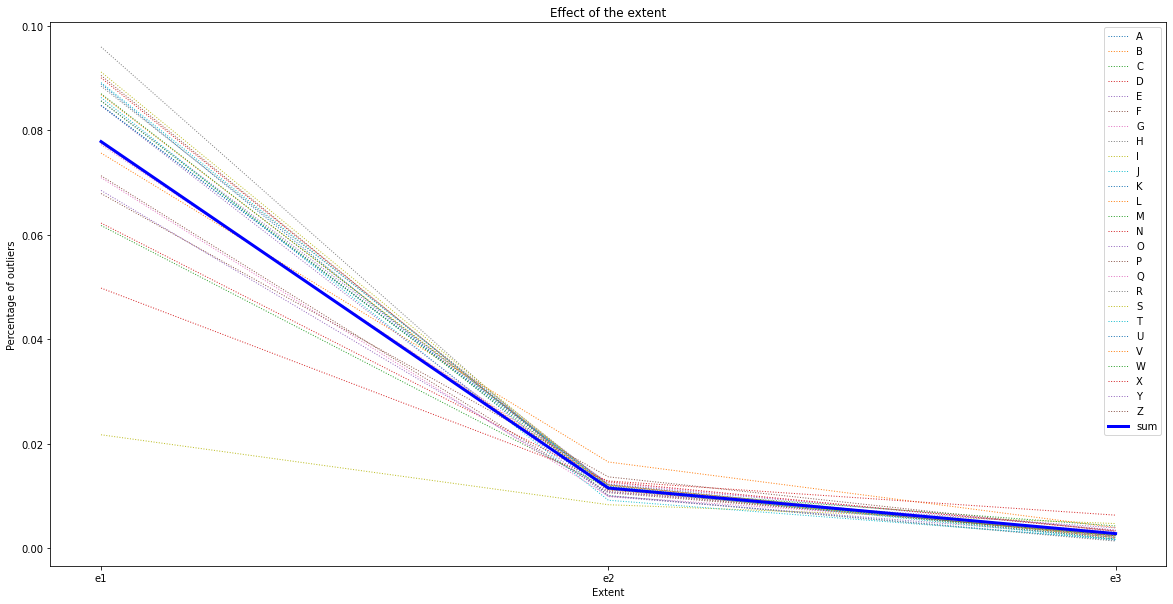

In [30]:
# plot the extent variable
fig = plt.figure(figsize = (20, 10))

for letter in alphabet:
    if letter == "sum":
        plt.plot(result_e["e"], result_e[letter],"b-" ,label= letter, linewidth=3)
    else:
        plt.plot(result_e["e"], result_e[letter],":" ,label= letter, linewidth=1)

plt.xlabel("Extent")
plt.ylabel("Percentage of outliers")
plt.title("Effect of the extent")
plt.legend()
plt.savefig("local_out_prob_extent.pdf")
plt.show()

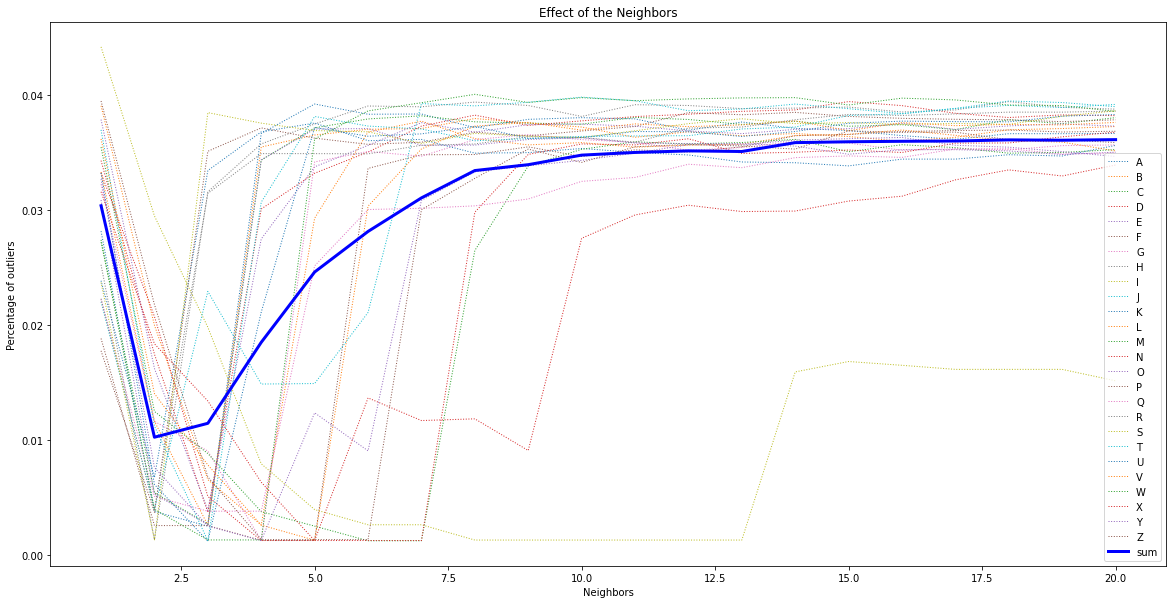

In [31]:
# plot the neighbors variable
fig = plt.figure(figsize = (20, 10))

for letter in alphabet:
    if letter == "sum":
        plt.plot(result_n["n"], result_n[letter],"b-" ,label= letter, linewidth=3)
    else:
        plt.plot(result_n["n"], result_n[letter],":" ,label= letter, linewidth=1)

plt.xlabel("Neighbors")
plt.ylabel("Percentage of outliers")
plt.title("Effect of the Neighbors")
plt.legend()
plt.savefig("local_out_prob_neighbors.pdf")
plt.show()

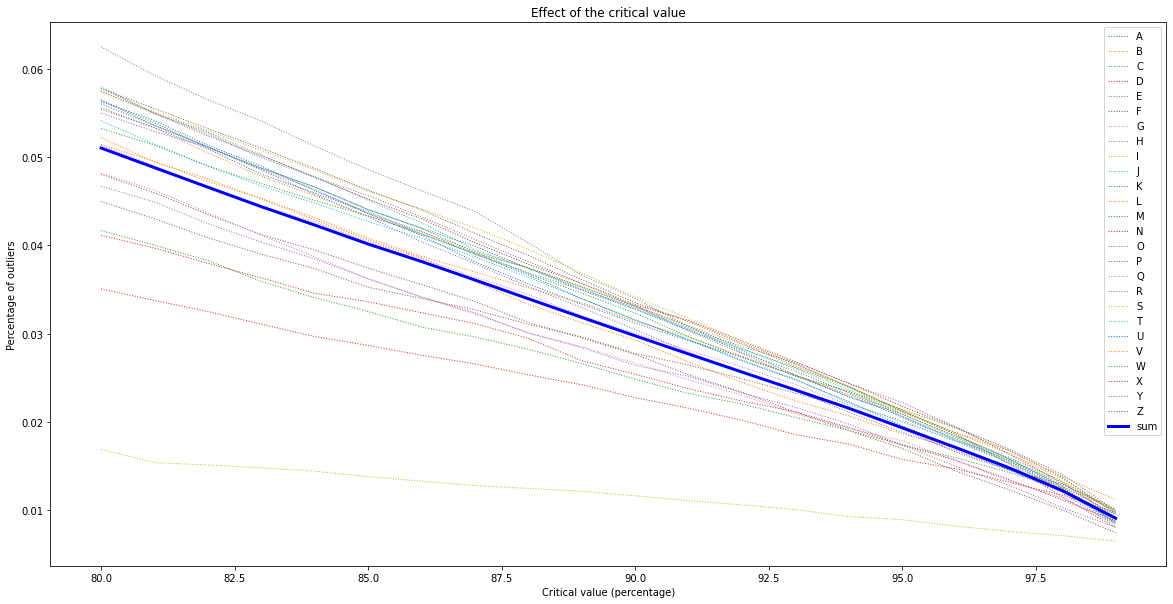

In [56]:
# plot the critical value variable
fig = plt.figure(figsize = (20, 10))

for letter in alphabet:
    if letter == "sum":
        plt.plot(result_per["%"], result_per[letter],"b-" ,label= letter, linewidth=3)
    else:
        plt.plot(result_per["%"], result_per[letter],":" ,label= letter, linewidth=1)

plt.xlabel("Critical value (percentage)")
plt.ylabel("Percentage of outliers")
plt.title("Effect of the critical value")
plt.legend()
plt.savefig("local_out_prob_crit_val.pdf")
plt.show()